In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

from expvocabulario import *
from knnpca import PCAKneighboursClasifier

In [4]:
# Carga de datos:

df = pd.read_csv("../data/imdb_small.csv", index_col=0)

print("Cantidad de documentos: {}".format(df.shape[0]))

text_train = df[df.type == 'train']["review"]
label_train = df[df.type == 'train']["label"]

text_test = df[df.type == 'test']["review"]
label_test = df[df.type == 'test']["label"]

print("Cantidad de instancias de entrenamiento = {}".format(len(text_train)))
print("Cantidad de instancias de test = {}".format(len(text_test)))

print("Class balance : {} pos {} neg".format(
    (label_train == 'pos').sum() / label_train.shape[0], 
    (label_train == 'neg').sum() / label_train.shape[0]
))

Cantidad de documentos: 12500
Cantidad de instancias de entrenamiento = 6225
Cantidad de instancias de test = 6275
Class balance : 0.49493975903614457 pos 0.5050602409638554 neg


In [ ]:
vectorizer = CountVectorizer(max_df=0.90, min_df=0.01, max_features=5000)

vectorizer.fit(text_train)

X_train, y_train = vectorizer.transform(text_train), (label_train == 'pos').values
X_test, y_test = vectorizer.transform(text_test), (label_test == 'pos').values

---

## Variación del accuracy para distintos tamaños de set de entrenamiento

Del enunciado:

> Analizar la calidad de los resultados obtenidos al combinar kNN con PCA, para un rango
> amplio de instancias de entrenamiento. Utilizar desde muy pocas hasta todas las
> disponibles para identificar en qu´e situación se comporta mejor cada uno de los
> métodos.

Se diseñó el experimento tal que, dados $k, \alpha$, se varió el tamaño muestral del set de entrenamiento.

### Primer intento: grid search

Como primer intento se hizo el siguiente grid search. Tuvo el problema de que la granularidad de `SUBSAMPLING_RATIOS` es muy baja.

In [49]:
SUBSAMPLING_RATIOS = [.1, .2, .3, .4, .5, .6, .7, .8, .999]
KS = [5, 100, 300]
ALPHAS = [10, 50, 100]

# ==============================================================================

# Se vectoriza una sola vez. Este experimento se hizo para un solo par de
# `max_df`, `min_df`.
vectorizer = CountVectorizer(max_df=0.90, min_df=0.01, max_features=5000)
vectorizer.fit(text_train)
X_train, y_train = vectorizer.transform(text_train), (label_train == 'pos').values
X_test, y_test = vectorizer.transform(text_test), (label_test == 'pos').values
X_train = X_train.todense()
X_test = X_test.todense()

results_train_subsampling = exp_grid_train_subsample(X_train, y_train, X_test,
                                                     y_test, SUBSAMPLING_RATIOS,
                                                     KS, ALPHAS)
results_train_subsampling = pd.DataFrame(list(results_train_subsampling))

# Guardar los datos en disco
results_train_subsampling.to_csv('results/subsampling.csv')

ratio: 0.1, k: 5, alpha: 10
ratio: 0.1, k: 5, alpha: 50
ratio: 0.1, k: 5, alpha: 100
ratio: 0.1, k: 100, alpha: 10
ratio: 0.1, k: 100, alpha: 50
ratio: 0.1, k: 100, alpha: 100
ratio: 0.1, k: 300, alpha: 10
ratio: 0.1, k: 300, alpha: 50
ratio: 0.1, k: 300, alpha: 100
ratio: 0.2, k: 5, alpha: 10
ratio: 0.2, k: 5, alpha: 50
ratio: 0.2, k: 5, alpha: 100
ratio: 0.2, k: 100, alpha: 10
ratio: 0.2, k: 100, alpha: 50
ratio: 0.2, k: 100, alpha: 100
ratio: 0.2, k: 300, alpha: 10
ratio: 0.2, k: 300, alpha: 50
ratio: 0.2, k: 300, alpha: 100
ratio: 0.3, k: 5, alpha: 10
ratio: 0.3, k: 5, alpha: 50
ratio: 0.3, k: 5, alpha: 100
ratio: 0.3, k: 100, alpha: 10
ratio: 0.3, k: 100, alpha: 50
ratio: 0.3, k: 100, alpha: 100
ratio: 0.3, k: 300, alpha: 10
ratio: 0.3, k: 300, alpha: 50
ratio: 0.3, k: 300, alpha: 100
ratio: 0.4, k: 5, alpha: 10
ratio: 0.4, k: 5, alpha: 50
ratio: 0.4, k: 5, alpha: 100
ratio: 0.4, k: 100, alpha: 10
ratio: 0.4, k: 100, alpha: 50
ratio: 0.4, k: 100, alpha: 100
ratio: 0.4, k: 300, alp

/home/j/Code/mn-tp2/notebooks/expvocabulario.py:137: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[data['k'] == k][data['acc'] == acc]


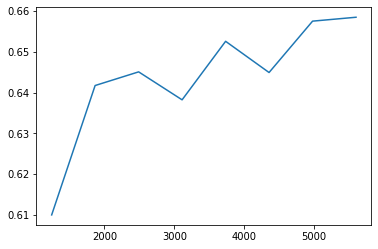

In [72]:
plot_exp_train_subsample_simple(results_train_subsampling, k=100, alpha=100)

### Intento 2: Aumentando granularidad

Repito el experimento con el doble de granularidad. Esta vez, fijo $k = 100$, $\alpha = 100$.

In [6]:
results_exp2 = pd.DataFrame(results_exp2)

# Guardar los datos en disco
results_exp2.to_csv('results/subsampling_exp2.csv')

In [4]:
# ==============================================================================
SUBSAMPLING_RATIOS = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,
                      0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
KS = [100]
ALPHAS = [100]

# ==============================================================================

# Se vectoriza una sola vez. Este experimento se hizo para un solo par de
# `max_df`, `min_df`.
vectorizer = CountVectorizer(max_df=0.90, min_df=0.01, max_features=5000)
vectorizer.fit(text_train)
X_train, y_train = vectorizer.transform(text_train), (label_train == 'pos').values
X_test, y_test = vectorizer.transform(text_test), (label_test == 'pos').values
X_train = X_train.todense()
X_test = X_test.todense()

results_exp2 = exp_grid_train_subsample(X_train, y_train, X_test,
                                                     y_test, SUBSAMPLING_RATIOS,
                                                     KS, ALPHAS, n_repeats=10)
results_exp2 = pd.DataFrame(results_exp2)

# Guardar los datos en disco
results_exp2.to_csv('results/subsampling_exp2.csv')

def configurations()
def wrapper()
gen_configs
computando
ratio = 0.05, k = 100, alpha = 100
ratio = 0.65, k = 100, alpha = 100
ratio = 0.3, k = 100, alpha = 100
ratio = 0.9, k = 100, alpha = 100
ratio = 0.95, k = 100, alpha = 100
ratio = 0.05, k = 100, alpha = 100
ratio = 0.7, k = 100, alpha = 100
ratio = 0.75, k = 100, alpha = 100
ratio = 0.35, k = 100, alpha = 100
ratio = 0.1, k = 100, alpha = 100
ratio = 0.8, k = 100, alpha = 100
ratio = 0.85, k = 100, alpha = 100
ratio = 0.1, k = 100, alpha = 100
ratio = 0.9, k = 100, alpha = 100
ratio = 0.95, k = 100, alpha = 100
ratio = 0.4, k = 100, alpha = 100
ratio = 0.05, k = 100, alpha = 100
ratio = 0.15, k = 100, alpha = 100
ratio = 0.45, k = 100, alpha = 100
ratio = 0.15, k = 100, alpha = 100
ratio = 0.1, k = 100, alpha = 100
ratio = 0.2, k = 100, alpha = 100
ratio = 0.5, k = 100, alpha = 100
ratio = 0.2, k = 100, alpha = 100
ratio = 0.55, k = 100, alpha = 100
ratio = 0.25, k = 100, alpha = 100
ratio = 0.15, k = 100, alpha = 100
ratio = 0

Text(0, 0.5, 'accuracy')

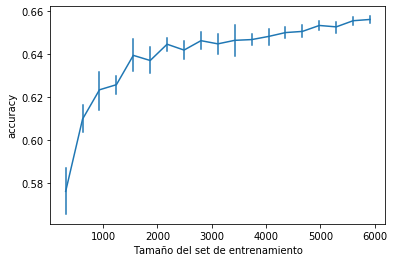

In [14]:
ax = sns.lineplot(x='n_train', y='acc', err_style='bars', data=results_exp2)
ax.set_xlabel('Tamaño del set de entrenamiento')
ax.set_ylabel('accuracy')

Con esto se obtuvo un mejor gráfico. Dejo corriendo con más combinaciones de $k$, $acc$

In [15]:
# ==============================================================================
SUBSAMPLING_RATIOS = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,
                      0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
KS = [10, 50, 150]
ALPHAS = [100]

# ==============================================================================

# Se vectoriza una sola vez. Este experimento se hizo para un solo par de
# `max_df`, `min_df`.
vectorizer = CountVectorizer(max_df=0.90, min_df=0.01, max_features=5000)
vectorizer.fit(text_train)
X_train, y_train = vectorizer.transform(text_train), (label_train == 'pos').values
X_test, y_test = vectorizer.transform(text_test), (label_test == 'pos').values
X_train = X_train.todense()
X_test = X_test.todense()

results_exp3 = exp_grid_train_subsample(X_train, y_train, X_test,
                                                     y_test, SUBSAMPLING_RATIOS,
                                                     KS, ALPHAS, n_repeats=10)
results_exp3 = pd.DataFrame(results_exp3)

# Guardar los datos en disco
results_exp3.to_csv('results/subsampling_exp3.csv')

# ==============================================================================
SUBSAMPLING_RATIOS = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,
                      0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
KS = [100]
ALPHAS = [10, 20, 50]

# ==============================================================================

# Se vectoriza una sola vez. Este experimento se hizo para un solo par de
# `max_df`, `min_df`.
vectorizer = CountVectorizer(max_df=0.90, min_df=0.01, max_features=5000)
vectorizer.fit(text_train)
X_train, y_train = vectorizer.transform(text_train), (label_train == 'pos').values
X_test, y_test = vectorizer.transform(text_test), (label_test == 'pos').values
X_train = X_train.todense()
X_test = X_test.todense()

results_exp4 = exp_grid_train_subsample(X_train, y_train, X_test,
                                                     y_test, SUBSAMPLING_RATIOS,
                                                     KS, ALPHAS, n_repeats=10)
results_exp4 = pd.DataFrame(results_exp4)

# Guardar los datos en disco
results_exp4.to_csv('results/subsampling_exp4.csv')

def configurations()
def wrapper()
gen_configs
computando
ratio = 0.05, k = 10, alpha = 100
ratio = 0.65, k = 10, alpha = 100
ratio = 0.3, k = 10, alpha = 100
ratio = 0.9, k = 10, alpha = 100
ratio = 0.9, k = 50, alpha = 100
ratio = 0.9, k = 150, alpha = 100
ratio = 0.65, k = 50, alpha = 100
ratio = 0.95, k = 10, alpha = 100
ratio = 0.95, k = 50, alpha = 100
ratio = 0.95, k = 150, alpha = 100
ratio = 0.3, k = 50, alpha = 100
ratio = 0.65, k = 150, alpha = 100
ratio = 0.05, k = 10, alpha = 100
ratio = 0.05, k = 50, alpha = 100
ratio = 0.7, k = 10, alpha = 100
ratio = 0.7, k = 50, alpha = 100
ratio = 0.3, k = 150, alpha = 100
ratio = 0.05, k = 50, alpha = 100
ratio = 0.7, k = 150, alpha = 100
ratio = 0.05, k = 150, alpha = 100
ratio = 0.75, k = 10, alpha = 100
ratio = 0.35, k = 10, alpha = 100
ratio = 0.75, k = 50, alpha = 100
ratio = 0.05, k = 150, alpha = 100
ratio = 0.75, k = 150, alpha = 100
ratio = 0.1, k = 10, alpha = 100
ratio = 0.35, k = 50, alpha = 100
ratio = 0.8, k = 10, alpha

ratio = 0.7, k = 50, alpha = 100
ratio = 0.7, k = 150, alpha = 100
ratio = 0.55, k = 150, alpha = 100
ratio = 0.75, k = 10, alpha = 100
ratio = 0.2, k = 10, alpha = 100
ratio = 0.1, k = 50, alpha = 100
ratio = 0.6, k = 10, alpha = 100
ratio = 0.75, k = 50, alpha = 100
ratio = 0.75, k = 150, alpha = 100
ratio = 0.6, k = 50, alpha = 100
ratio = 0.2, k = 50, alpha = 100
ratio = 0.8, k = 10, alpha = 100
ratio = 0.1, k = 150, alpha = 100
ratio = 0.6, k = 150, alpha = 100
ratio = 0.8, k = 50, alpha = 100
ratio = 0.8, k = 150, alpha = 100
ratio = 0.65, k = 10, alpha = 100
ratio = 0.85, k = 10, alpha = 100
ratio = 0.2, k = 150, alpha = 100
ratio = 0.85, k = 50, alpha = 100
ratio = 0.85, k = 150, alpha = 100
ratio = 0.65, k = 50, alpha = 100
ratio = 0.15, k = 10, alpha = 100
ratio = 0.9, k = 10, alpha = 100
ratio = 0.9, k = 50, alpha = 100
ratio = 0.65, k = 150, alpha = 100
ratio = 0.9, k = 150, alpha = 100
ratio = 0.25, k = 10, alpha = 100
ratio = 0.95, k = 10, alpha = 100
ratio = 0.95, k = 50

ratio = 0.15, k = 50, alpha = 100
ratio = 0.45, k = 50, alpha = 100
ratio = 0.45, k = 50, alpha = 100
ratio = 0.15, k = 10, alpha = 100
ratio = 0.45, k = 150, alpha = 100
ratio = 0.15, k = 150, alpha = 100
ratio = 0.45, k = 150, alpha = 100
ratio = 0.5, k = 10, alpha = 100
ratio = 0.15, k = 50, alpha = 100
ratio = 0.5, k = 10, alpha = 100
ratio = 0.2, k = 10, alpha = 100
ratio = 0.5, k = 50, alpha = 100
ratio = 0.5, k = 50, alpha = 100
ratio = 0.5, k = 150, alpha = 100
ratio = 0.15, k = 150, alpha = 100
ratio = 0.2, k = 50, alpha = 100
ratio = 0.5, k = 150, alpha = 100
ratio = 0.55, k = 10, alpha = 100
ratio = 0.55, k = 10, alpha = 100
ratio = 0.2, k = 10, alpha = 100
ratio = 0.55, k = 50, alpha = 100
ratio = 0.2, k = 150, alpha = 100
ratio = 0.55, k = 50, alpha = 100
ratio = 0.55, k = 150, alpha = 100
ratio = 0.2, k = 50, alpha = 100
ratio = 0.55, k = 150, alpha = 100
ratio = 0.25, k = 10, alpha = 100
ratio = 0.5, k = 10, alpha = 100
ratio = 0.6, k = 10, alpha = 100
ratio = 0.5, k = 5

ratio = 0.5, k = 100, alpha = 50
ratio = 0.55, k = 100, alpha = 20
ratio = 0.25, k = 100, alpha = 50
ratio = 0.75, k = 100, alpha = 10
ratio = 0.75, k = 100, alpha = 20
ratio = 0.55, k = 100, alpha = 50
ratio = 0.75, k = 100, alpha = 50
ratio = 0.8, k = 100, alpha = 10
ratio = 0.8, k = 100, alpha = 20
ratio = 0.8, k = 100, alpha = 10
ratio = 0.8, k = 100, alpha = 50
ratio = 0.6, k = 100, alpha = 10
ratio = 0.8, k = 100, alpha = 20
ratio = 0.3, k = 100, alpha = 10
ratio = 0.6, k = 100, alpha = 20
ratio = 0.8, k = 100, alpha = 50
ratio = 0.85, k = 100, alpha = 10
ratio = 0.3, k = 100, alpha = 20
ratio = 0.85, k = 100, alpha = 20
ratio = 0.6, k = 100, alpha = 50
ratio = 0.85, k = 100, alpha = 10
ratio = 0.85, k = 100, alpha = 50
ratio = 0.85, k = 100, alpha = 20
ratio = 0.3, k = 100, alpha = 50
ratio = 0.9, k = 100, alpha = 10
ratio = 0.85, k = 100, alpha = 50
ratio = 0.9, k = 100, alpha = 20
ratio = 0.9, k = 100, alpha = 50
ratio = 0.45, k = 100, alpha = 10
ratio = 0.9, k = 100, alpha = 

ratio = 0.6, k = 100, alpha = 10
ratio = 0.9, k = 100, alpha = 50
ratio = 0.6, k = 100, alpha = 20
ratio = 0.25, k = 100, alpha = 50
ratio = 0.6, k = 100, alpha = 10
ratio = 0.25, k = 100, alpha = 10
ratio = 0.6, k = 100, alpha = 50
ratio = 0.6, k = 100, alpha = 20
ratio = 0.25, k = 100, alpha = 20
ratio = 0.6, k = 100, alpha = 50
ratio = 0.65, k = 100, alpha = 10
ratio = 0.25, k = 100, alpha = 50
ratio = 0.65, k = 100, alpha = 20
ratio = 0.3, k = 100, alpha = 10
ratio = 0.65, k = 100, alpha = 10
ratio = 0.65, k = 100, alpha = 50
ratio = 0.3, k = 100, alpha = 20
ratio = 0.65, k = 100, alpha = 20
ratio = 0.65, k = 100, alpha = 50
ratio = 0.3, k = 100, alpha = 50
ratio = 0.25, k = 100, alpha = 10
ratio = 0.3, k = 100, alpha = 10
ratio = 0.25, k = 100, alpha = 20
ratio = 0.7, k = 100, alpha = 10
ratio = 0.3, k = 100, alpha = 20
ratio = 0.7, k = 100, alpha = 20
ratio = 0.7, k = 100, alpha = 50
ratio = 0.25, k = 100, alpha = 50
ratio = 0.3, k = 100, alpha = 50
ratio = 0.85, k = 100, alpha =

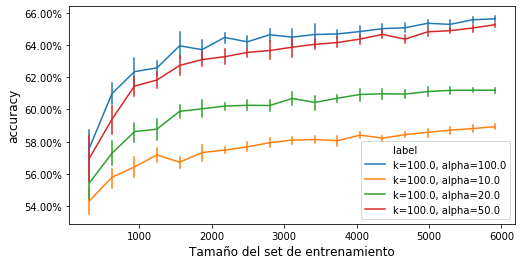

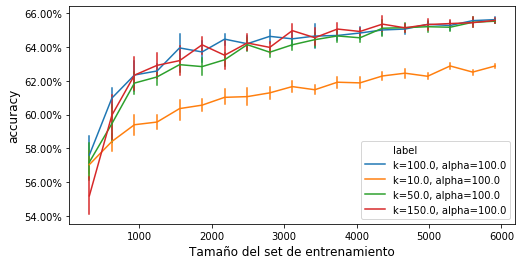

In [7]:
data = pd.concat([
    pd.read_csv('results/subsampling_exp2.csv'),
    pd.read_csv('results/subsampling_exp3.csv'),
    pd.read_csv('results/subsampling_exp4.csv'),
])

def plot_subsampling_experiment(data, ax=None):
    
    data = data.copy()
    
    def fmt_param_label(row):
        'Genera el label para la fila basado en k, alpha'
        k = row['k']
        alpha = row['alpha']
        return f'k={k}, alpha={alpha}'
    
    data['label'] = data.apply(fmt_param_label, axis=1)
    
    ax = sns.lineplot(x='n_train', y='acc', hue='label', err_style='bars', data=data, ax=ax)
    ax.legend(loc='lower right')
    ax.set_xlabel('Tamaño del set de entrenamiento', fontsize=12)
    ax.set_ylabel('accuracy', fontsize=12)
    
    # Display Y tics as percentage:
    ax.set_yticklabels([f'{x:.2%}' for x in ax.get_yticks()])

_, ax = plt.subplots(1, 1, figsize=(8, 4))
plot_subsampling_experiment(data[data['k'] == 100], ax)
plt.savefig('plots/exp_subsampling_k_fijo.png')
plt.show()

_, ax = plt.subplots(1, 1, figsize=(8, 4))
plot_subsampling_experiment(data[data['alpha'] == 100], ax)
plt.savefig('plots/exp_subsampling_alpha_fijo.png')
plt.show()